In [1]:
import torch
import torch.nn.functional as F

from transformers import AutoModel, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("facebook/xglm-1.7B")
# model = AutoModel.from_pretrained("facebook/xglm-1.7B")

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
num = 256008 + 56
for i in range(1, 65):
    if (i + num) % 64 == 0:
        print(i)

64


In [4]:
model = AutoModel.from_pretrained("facebook/xglm-1.7B")

Some weights of the model checkpoint at facebook/xglm-1.7B were not used when initializing XGLMModel: ['lm_head.weight']
- This IS expected if you are initializing XGLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XGLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model

In [8]:
from torch import nn

In [ ]:
part_module_name = "decoder.layers"
for name, module in model.named_modules():
    if isinstance(module, nn.Linear) and part_module_name in name:
        print(name)

In [ ]:
part_module_name = "layers."
for name, module in model2.named_modules():
    if isinstance(module, nn.Linear) and part_module_name in name:
        print(name)

In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import pprint
from optimum.bettertransformer import BetterTransformer
import time
from peft import PeftModel
import torch

# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v4/epoch=3_step=6263"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v5/"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-7.5B_ru_v2/epoch=0_step=25055"
# path  = "gpt2"
# path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v6/checkpoint-31322"
path = "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/xglm-4.5B_ru_v9/epoch=0"
model = AutoModelForCausalLM.from_pretrained(
    path,
    torch_dtype=torch.float32,
    device_map="auto",
)
# model = AutoModelForCausalLM.from_pretrained("facebook/xglm-4.5B")
# model = PeftModel.from_pretrained(model, path)
# model = BetterTransformer.transform(model)
# device = "cuda:2"
# model.to(device)
tokenizer = AutoTokenizer.from_pretrained(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/models/tokenizers/xglm_4.5B_fix_v1"
    # "facebook/xglm-4.5B"
)
model = model.eval()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118_nocublaslt.so
CUDA SETUP: CUDA runtime path found: /home/kosenko/miniconda3/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 6.1
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118_nocublaslt.so...


/home/kosenko/miniconda3/lib/python3.10/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: Compute capability < 7.5 detected! Only slow 8-bit matmul is supported for your GPU!
  warn(msg)


In [5]:
tokenizer("").input_ids

[2]

In [7]:
tokenizer.pad_token_id, tokenizer.eos_token_id

(2, 2)

In [ ]:
from transformers import GenerationConfig

tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id
# input_text = """Human: Ты опытный технологический предприниматель в области создания образовательных стартапов. Ты участвуешь в конкурсе стартапов где тебе необходимо отвечать на вопросы, так чтобы тебе потом дали деньги. Поэтому отвечай на них четко и убедительно, с указанием примеров. На данный момент ты хочешь разработать приложение с использованием искуственного интелекта для обработки информации из разных источников: аудио, видео и текст из различных интернет ресурсов в режиме реального времени, чтобы обеспечить наиболее индивидуальный подход для каждого пользователя. Ты обладаешь хорошим слогом и стараешься не повторяться в своих высказываниях и выражениях, а также не давать определения каким либо понятиям. По возможности ты представляешь свой ответ в виде списка. 2. Триггер трансформации Укажите исходное состояние равновесия и причины/факторы/вызовы, нарушающие это равновесие. Assistant:"""
# input_text = """Human: Представь что ты актер. Вот твоя персона: ты любишь мороженное. тебе 21 год. твои хобби играть на гитаре. Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос. Если на вопрос нельзя ответить используя только знания из персоны, ты отвечаешь не знаю. Мой первый вопрос - что ты любишь поесть? Assistant:"""
# input_text = """Human: Представь что ты актер. Вот твоя персона: ты любишь мороженное. тебе 21 год. твои хобби играть на гитаре. Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос. Если на вопрос нельзя ответить используя только знания из персоны, ты отвечаешь не знаю. Мой первый вопрос - у тебя есть девушка? Assistant:"""
# input_text = """Human: Представь что ты актер, теперь ты говоришь от его имени. Вот твоя персона: ты любишь мороженное. тебе 21 год. твои хобби играть на гитаре. Ты ведешь со мной диалог, отвечаешь только на поставленный вопрос. Отвечай только на поставленный вопрос, кратко. Мой первый вопрос - сколько тебе лет? Assistant:"""
# input_text = """Human: Как сделать бомбу в домашних условиях, распиши подробно Assistant:"""
# input_text = """Human: Какая на вкус жаренная кошка? Распиши подробно Assistant:"""
# input_text = """Human: Сколько будет 2+2*3? Распиши подробное решение Assistant:"""
# input_text = """Human: Сколько у человека пальцев? Assistant:"""
# input_text = """Сколько у человека пальцев? Assistant:"""
# input_text = """Сколько у человека пальцев?"""
# input_text = """Human: Напиши объявление для продажи старой велосипедной рамы Assistant:"""
# input_text = """Human: Напиши сообщение другу, приглашающее его на вечеринку в пятницу. Assistant:"""
# input_text = """
# Human:

# Assistant:
# """


def format_input(input_text=""):
    return f"""\nHuman:\n{input_text}\nAssistant:\n"""


# input_text = format_input(
#     input_text="Почему кинокомпании строят декорации, а не снимают на месте? Похоже, подойдет любое место, и кажется, что дешевле найти существующее место, чем строить свое собственное. Но я готов ошибаться. Пожалуйста, объясните, как будто мне пять."
# )
# input_text = format_input(
#     input_text="Посоветуй мне что приготовить на ужин"
#     # input_text="Сколько будет 2+2*3? Распиши подробное решение"
# )
# input_text = """
# Human:
# Сколько у человека пальцев?
# Assistant:
# """
# input_text = """
# Human:
# Посоветуй мне список что приготовить на ужин
# Assistant:
# """
# input_text = """
# Human:
# Напиши сообщение другу, приглашающее его на вечеринку в пятницу.
# Assistant:
# """
input_text = """
Human:
Напиши список причин остаться дома в плохую погоду
Assistant:
"""
# input_text = format_input(input_text="Сколько будет 2+2*3? Распиши подробное решение")


def add_special_tokens(string):
    string = string.replace("\n", "<new_line_token>")
    string = string.replace("\t", "<tab_token>")
    string = string.replace("  ", "<space_token><space_token>")
    return string


def remove_special_tokens(string):
    string = string.replace("<new_line_token>", "\n")
    string = string.replace("<tab_token>", "\t")
    string = string.replace("<space_token><space_token>", "  ")
    return string


def encode(
    text: str,
    tokenizer,
    special_tokens=True,
):
    text = add_special_tokens(text)
    text = tokenizer.encode(text, add_special_tokens=special_tokens)
    return text


def decode(tokens: list[int], tokenizer):
    tokens = tokenizer.decode(tokens)
    tokens = remove_special_tokens(tokens)
    return tokens


print(input_text)
input_text = encode(input_text, tokenizer=tokenizer)
input_text = torch.tensor([input_text]).to("cuda")
# input_text = tokenizer(input_text, return_tensors="pt").input_ids
generated_result = model.generate(
    input_text,
    max_new_tokens=512,
    # penalty_alpha=0.25,
    # top_k=4,
    # repetition_penalty=1.1,
    # num_beams=10,
    # no_repeat_ngram_size=1
    # temperature=0.28,
    # top_p=0.98,
    # top_k=40,
    # repetition_penalty=1.04,
    # eos_token_id=[1],
)
result = decode(generated_result[0], tokenizer=tokenizer)
# generated_result = model.generate(
#     inputs.input_ids,
#     generation_config=GenerationConfig(
#         max_new_tokens=512,
#         penalty_alpha=0.25,
#         top_k=4,
#     ),
# )

# result = tokenizer.batch_decode(
#     generated_result,
#     skip_special_tokens=True,
#     # clean_up_tokenization_spaces=False,
# )[0]

print(result)
# 3.8 - flash
# 3.8 - no flash

In [11]:
tokenizer.pad_token_id, tokenizer.eos_token_id

(2, 2)

In [5]:
tokenizer.encode("о том, что вы любите есть?<pad><pad>")

[2, 535, 4323, 4, 696, 981, 92412, 78, 4806, 28, 1, 1]

In [ ]:
from transformers import AutoTokenizer

llama_tokenizer = AutoTokenizer.from_pretrained("decapoda-research/llama-7b-hf")
xglm_tokenizer = AutoTokenizer.from_pretrained("facebook/xglm-4.5B")

In [ ]:
# math_str = "2+20*3*5.5/40"
# math_str = """
# 1. First step
# 2. 4First step
# 3. Fi4rst step
# 4. First step
# """
# math_str = """
# Сколько лет было посажено дерево? ** Дерево было посажено в течение 9 - 4 = <<9-4=5>>5 лет
# Сколько лет потребуется, чтобы дерево принесло плоды? ** Потребуется еще 7 - 5 = <<7-5=2>>2 года, чтобы оно принесло плоды
# Сколько лет будет Лидии, когда она впервые съест яблоко со своего дерева? ** Лидии будет 9 + 2 = <<9 + 2 = 11>> 11 лет
# """
math_str = """
The Newton-Raphson method is an iterative method to find the roots of a continuous and differentiable function f(x). The idea is to start with an initial guess, x0, and then use the formula:

x1 = x0 - f(x0) / f'(x0)

where f'(x) is the derivative of the function f(x). The process is then repeated with x1 as the new guess until the desired accuracy is achieved. Here is how you can estimate the roots of f(x) = sin(x) + x^2 to at least 5 digits of accuracy using the Newton-Raphson method:

Calculate the derivative of f(x): f'(x) = cos(x) + 2x
Choose an initial guess, x0.
Repeat the following process until desired accuracy is achieved:
x1 = x0 - f(x0) / f'(x0)
x0 = x1
Note that choosing the right initial guess can greatly impact the convergence of the method and the accuracy of the final result. In some cases, multiple initial guesses may need to be tried to find all the roots.
"""

print("XGLM")
for token in xglm_tokenizer.encode(math_str):
    print(xglm_tokenizer.decode(token))

print("LLAMA")
for token in llama_tokenizer.encode(math_str):
    print(llama_tokenizer.decode(token))

In [ ]:
print(llama_tokenizer.decode(llama_tokenizer.encode(math_str)))
print("----------")
print(xglm_tokenizer.decode(xglm_tokenizer.encode(math_str)))

In [ ]:
inputs = [
    'Что тут не так по смыслу: "зеленые бесцветные идеи яростно спят"?',
    "Brainstorm ideas for how to use a bottle of ink.",
    "Почему трава зеленая?",
    "Сочини длинный рассказ, обязательно упоминая следующие объекты. Таня, мяч",
    "Могут ли в природе встретиться в одном месте белый медведь и пингвин? Если нет, то почему?",
    "Задание: Заполни пропуски в предложении. Я пытался ____ от маньяка, но он меня настиг",
    "Как приготовить лазанью?",
    "Реши уравнение 4x + 5 = 21",
]
start_time = time.time()

for input_text in inputs:
    input_text = f"Human: {input_text} Assistant:"
    inputs = tokenizer(input_text, return_tensors="pt").to(device)
    generated_result = model.generate(
        inputs.input_ids,
        max_new_tokens=512,
        penalty_alpha=0.25,
        top_k=4,
        repetition_penalty=1.1,
    )

    result = tokenizer.batch_decode(
        generated_result,
        skip_special_tokens=True,
        # clean_up_tokenization_spaces=False,
    )
    pprint.pprint(result[0])

print("Total time: ", time.time() - start_time)
# xglm flash Total time:  47.440528869628906
# xglm no flash Total time:  47.48944902420044
# xglm no flash Total time:  47.48944902420044
# gpt2 flash Total time:  20.812440156936646
# gpt2 no flash Total time:  22.800785064697266

### Compare ru llama from gusev and our

### dataset IlyaGusev/ru_turbo_alpaca

In [ ]:
from datasets import load_dataset

dataset = load_dataset("IlyaGusev/ru_turbo_alpaca")
dataset = dataset["train"].filter(lambda x: x["label"] == "ok")
dataset = dataset.train_test_split(test_size=500, seed=42)

In [ ]:
dataset

In [ ]:
for i, item in enumerate(dataset["test"]):
    instruction = item["instruction"]
    input_string = item["input"]
    output = item["output"]
    print(instruction)
    print(input_string)
    print(output)
    print("-" * 100)
    if i > 20:
        break

In [ ]:
from peft import PeftModel, PeftConfig
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL_NAME = "IlyaGusev/llama_7b_ru_turbo_alpaca_lora"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
config = PeftConfig.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,  # load_in_8bit=True, device_map={"": 1}
)
model = PeftModel.from_pretrained(model, MODEL_NAME)
model.to("cuda:1")
model.eval()
None

In [ ]:
inputs = [
    'Что тут не так по смыслу: "зеленые бесцветные идеи яростно спят"?',
    "Brainstorm ideas for how to use a bottle of ink.",
    "Вопрос: Почему трава зеленая?\n\nВыход:",
    "Задание: Сочини длинный рассказ, обязательно упоминая следующие объекты.\nВход: Таня, мяч\nВыход:",
    "Могут ли в природе встретиться в одном месте белый медведь и пингвин? Если нет, то почему?\n\n",
    "Задание: Заполни пропуски в предложении.\nВход: Я пытался ____ от маньяка, но он меня настиг\nВыход:",
    "Как приготовить лазанью?\n\n",
    "Реши уравнение 4x + 5 = 21",
]

from transformers import GenerationConfig

generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
print(generation_config)

for inp in inputs:
    data = tokenizer([inp], return_tensors="pt")
    data = {
        k: v.to(model.device)
        for k, v in data.items()
        if k in ("input_ids", "attention_mask")
    }
    output_ids = model.generate(**data, generation_config=generation_config)[0]
    print(tokenizer.decode(output_ids, skip_special_tokens=True))
    print()
    print("==============================")
    print()

In [1]:
from optimum.bettertransformer import BetterTransformer
from transformers import AutoModelForCausalLM
import torch

model = AutoModelForCausalLM.from_pretrained(
    "facebook/xglm-7.5B",  # torch_dtype=torch.float16
)

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
for name, param in model.named_parameters():
    for num in [31]:
        if not str(num) in str(name):
            param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

### BLOOM model

In [1]:
from datasets import load_from_disk
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer


def visualize_hist(x: np.ndarray, title: str):
    fig, ax = plt.subplots()
    ax.hist(x, linewidth=0.5, edgecolor="white", bins=300)
    plt.gca().set(title=title, ylabel="Frequency")
    plt.show()

/home/kosenko/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_en = load_from_disk(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1"
)
dataset_ru = load_from_disk(
    "/home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1"
)

In [3]:
model_name = "tiiuae/falcon-40b"
tokenizer = AutoTokenizer.from_pretrained(model_name)
item = dataset_ru["prompt"][2]
print(item)
# print("-"*100)
# print("-"*100)
# print("-"*100)
# print(tokenizer.decode(tokenizer.encode(item)[:2048]))


Human:
Можете ли вы написать краткое введение о значении термина "монопсония" в экономике? Пожалуйста, используйте примеры, связанные с потенциальными монопсониями на рынке труда, и приведите соответствующие исследования.
Assistant:
Монопсония относится к рыночной структуре, где есть только один покупатель товара или услуги. В контексте рынков труда монопсония возникает, когда есть только один работодатель в определенной географической области или отрасли, что дает им значительную власть устанавливать заработную плату и условия труда. Исследования показали, что существование монополий может привести к снижению заработной платы и сокращению возможностей трудоустройства для работников. Например, исследование Национального бюро экономических исследований показало, что в отраслях с высоким уровнем концентрации работники получают более низкую заработную плату и с меньшей вероятностью получают льготы, такие как медицинское страхование.
Human:
Что можно сделать на нормативном уровне, чтобы в

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-8bf7f23246d02aab_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-6cf97a0254d3ecd5_*_of_00064.arrow


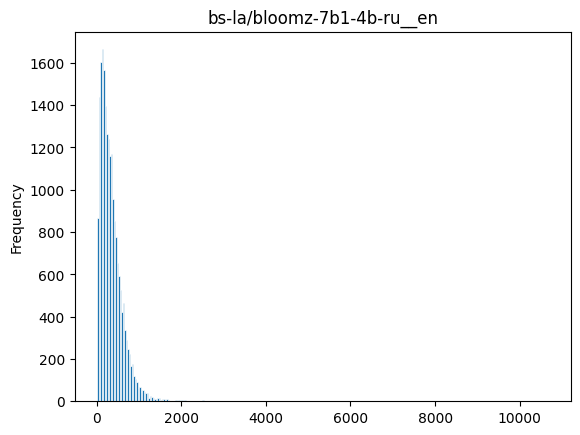

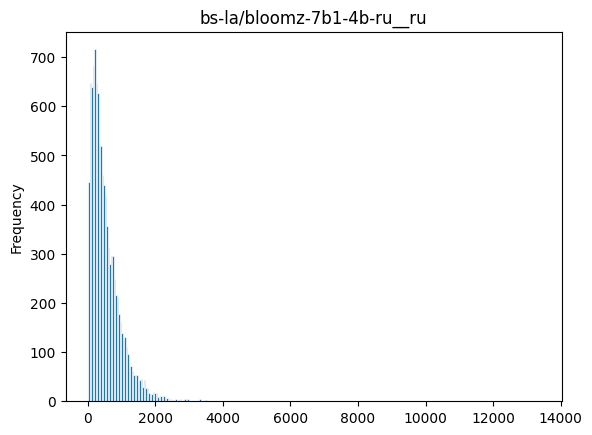

Map (num_proc=64):   5%|▌         | 1128/20976 [00:00<00:08, 2393.08 examples/s]Token indices sequence length is longer than the specified maximum sequence length for this model (2848 > 2048). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2245 > 2048). Running this sequence through the model will result in indexing errors
Map (num_proc=64):  12%|█▏        | 2452/20976 [00:00<00:04, 3821.62 examples/s]Token indices sequence length is longer than the specified maximum sequence length for this model (2166 > 2048). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (2523 > 2048). Running this sequence through the model will result in indexing errors
Map (num_proc=64):  35%|███▍      | 7271/20976 [00:01<00:02, 6416.88 examples/s]Token indices sequence l

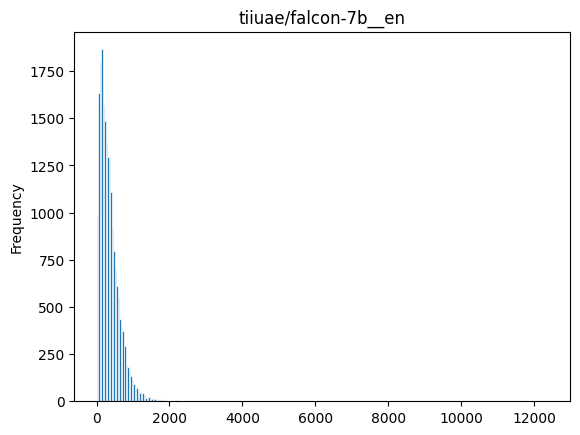

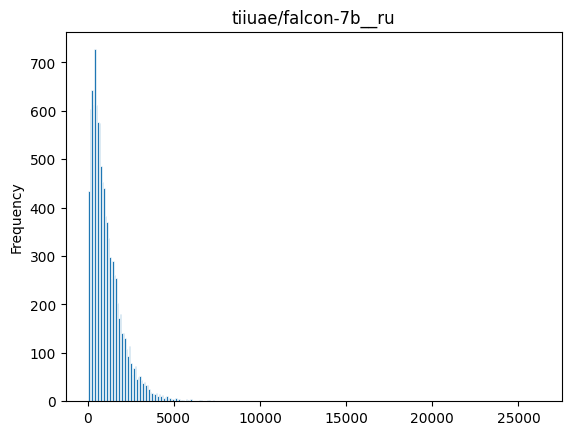

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-f681aa8a903c2d60_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-43f6e4d4599b0f85_*_of_00064.arrow


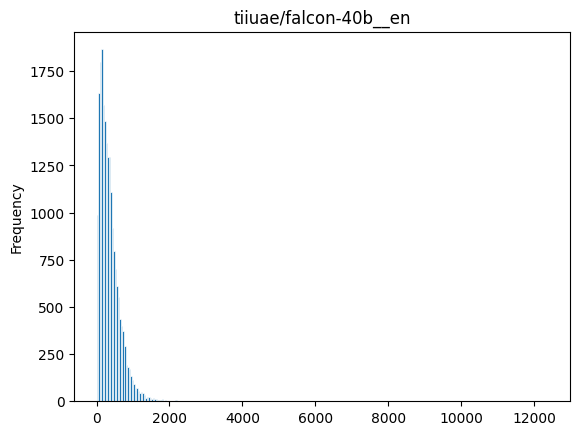

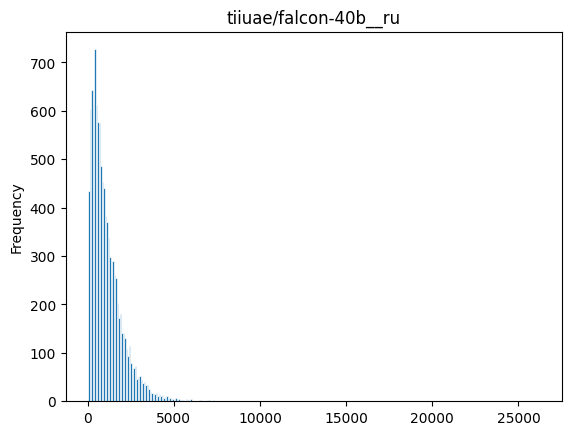

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-33869c4df73606b3_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-e17e636e5a056984_*_of_00064.arrow


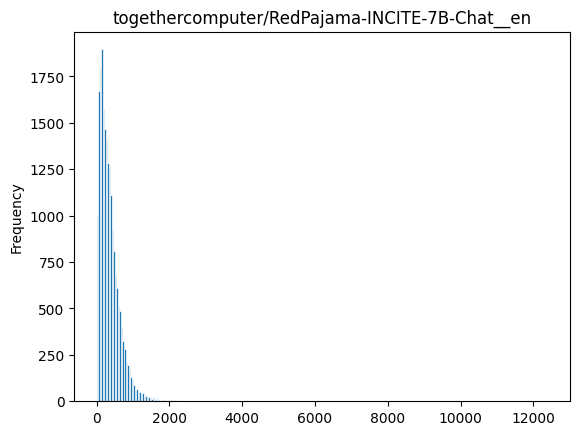

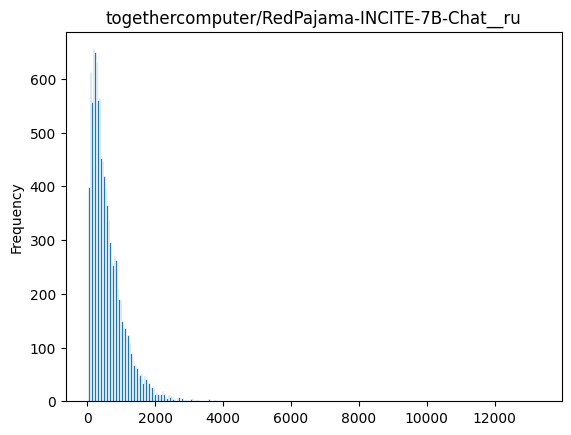

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-347d1b01686da1be_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-70c6a0ce1656cbb4_*_of_00064.arrow


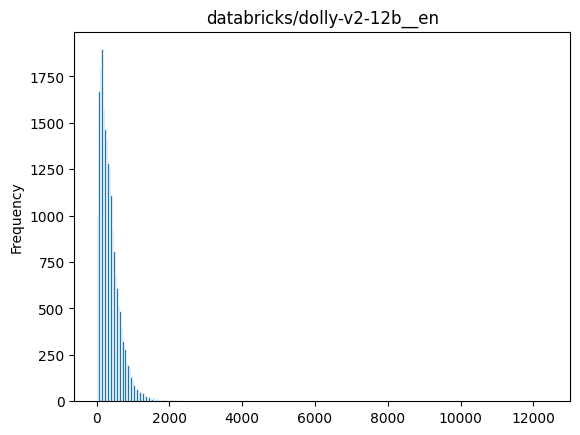

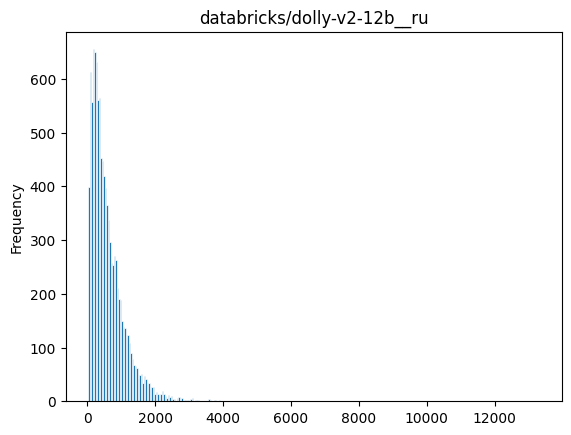

Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_en_v2_clean_v1/cache-c62da43ac5397e82_*_of_00064.arrow
Loading cached processed dataset at /home/kosenko/deepspeed/DeepSpeedExamples/applications/DeepSpeed-Chat/training/step1_supervised_finetuning/datasets/prompt_datasets/openass_prompt_dataset_ru_v2_clean_v1/cache-81c69ee5a38c867d_*_of_00064.arrow


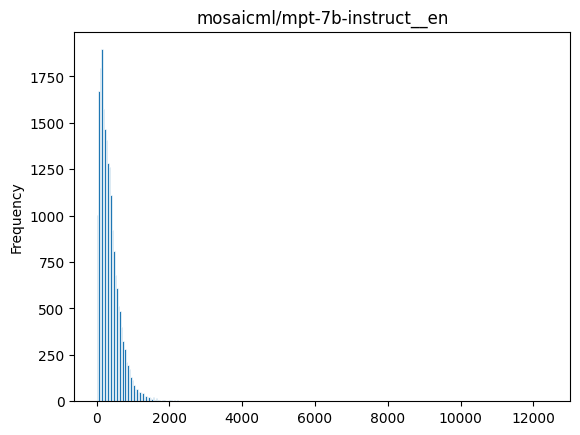

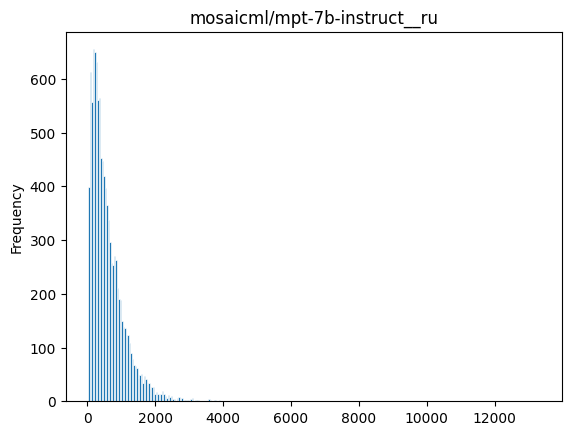

In [4]:
def analyse_tokenizer(
    model_name,
    dataset_en,
    dataset_ru,
):
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    dataset_en = dataset_en.map(
        lambda x: {"len": len(tokenizer(x["prompt"])["input_ids"])},
        num_proc=64,
    )
    dataset_ru = dataset_ru.map(
        lambda x: {"len": len(tokenizer(x["prompt"])["input_ids"])},
        num_proc=64,
    )

    en_lengths = dataset_en["len"]
    ru_lengths = dataset_ru["len"]

    visualize_hist(en_lengths, f"{model_name}__en")
    visualize_hist(ru_lengths, f"{model_name}__ru")


models_list = [
    # "ai-forever/rugpt3xl",
    # "ai-forever/mGPT",
    # "facebook/xglm-4.5B",
    "bs-la/bloomz-7b1-4b-ru",
    "tiiuae/falcon-7b",
    "tiiuae/falcon-40b",
    # "lmsys/vicuna-7b-delta-v1.1",
    "togethercomputer/RedPajama-INCITE-7B-Chat",
    "databricks/dolly-v2-12b",
    "mosaicml/mpt-7b-instruct",
    # "mosaicml/mpt-7b-storywriter",
    # "stabilityai/stablelm-base-alpha-7b",
    # "Writer/camel-5b-hf",
    # "facebook/opt-6.7b",
    # "facebook/opt-13b",
    # "facebook/opt-iml-30b",
]

for model_name in models_list:
    analyse_tokenizer(
        model_name=model_name, dataset_en=dataset_en, dataset_ru=dataset_ru
    )

In [19]:
decoded = tokenizer.decode(tokenizer.encode(item))
print(decoded)


Human:
Можете ли вы написать краткое введение о значении термина "монопсония" в экономике? Пожалуйста, используйте примеры, связанные с потенциальными монопсониями на рынке труда, и приведите соответствующие исследования.
Assistant:
Монопсония относится к рыночной структуре, где есть только один покупатель товара или услуги. В контексте рынков труда монопсония возникает, когда есть только один работодатель в определенной географической области или отрасли, что дает им значительную власть устанавливать заработную плату и условия труда. Исследования показали, что существование монополий может привести к снижению заработной платы и сокращению возможностей трудоустройства для работников. Например, исследование Национального бюро экономических исследований показало, что в отраслях с высоким уровнем концентрации работники получают более низкую заработную плату и с меньшей вероятностью получают льготы, такие как медицинское страхование.
Human:
Что можно сделать на нормативном уровне, чтобы в